<a href="https://colab.research.google.com/github/LucasAfa/Projeto2-IF775/blob/main/projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import matplotlib as mpl




In [ ]:
fifa20=pd.read_csv("https://raw.githubusercontent.com/LucasAfa/Projeto2-IF775/main/players_20.csv", header=0)
print(fifa20)

       sofifa_id                                         player_url  ...   rcb    rb
0         158023  https://sofifa.com/player/158023/lionel-messi/...  ...  52+2  63+2
1          20801  https://sofifa.com/player/20801/c-ronaldo-dos-...  ...  53+3  61+3
2         190871  https://sofifa.com/player/190871/neymar-da-sil...  ...  46+3  61+3
3         200389  https://sofifa.com/player/200389/jan-oblak/20/...  ...   NaN   NaN
4         183277  https://sofifa.com/player/183277/eden-hazard/2...  ...  49+3  61+3
...          ...                                                ...  ...   ...   ...
18273     245006  https://sofifa.com/player/245006/shuai-shao/20...  ...  46+2  45+2
18274     250995  https://sofifa.com/player/250995/mingjie-xiao/...  ...  47+2  46+2
18275     252332  https://sofifa.com/player/252332/wei-zhang/20/...  ...  49+2  47+2
18276     251110  https://sofifa.com/player/251110/haijian-wang/...  ...  49+2  48+2
18277     233449  https://sofifa.com/player/233449/ximing-pan/20.

In [ ]:
fifa20 = fifa20[(fifa20.team_position != "GK")]
fifa20.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
5,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,28,1991-06-28,181,70,Belgium,Manchester City,91,91,90000000,370000,"CAM, CM",Right,4,5,4,High/High,Normal,Yes,166500000.0,"#Dribbler, #Playmaker , #Engine, #Distance Sh...",RCM,17.0,NaN,2015-08-30,2023.0,RCM,7.0,76.0,86.0,92.0,86.0,61.0,78.0,NaN,NaN,NaN,...,76,61,88,94,79,91,68,58,51,15,13,5,10,13,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
fifa20['nationality'] = fifa20['nationality'].astype('category')
fifa20['club'] = fifa20['club'].astype('category')
fifa20['team_position'] = fifa20['team_position'].astype('category')

fifa20['team_position'] = fifa20['team_position'].cat.codes
fifa20['country_code'] = fifa20['nationality'].cat.codes
fifa20['club_code'] = fifa20['club'].cat.codes

fifa20 = fifa20._get_numeric_data()


In [ ]:
# Afim de reduzir a quantidade de dados úteis para nossa analise, iremos dropar os jogadores com potencial abaixo do terceiro quartil, pois após plotar o histograma e o plotbox, além do conhecimento geral sobre o jogo,
# Sabemos que existem milhares de jogadores mas são poucos os que se destacam, e nesse caso, queríamos analisar os destaques. Porém, não bastava apenas literalmente os outlyers, pois eles seriam por assim dizer os "incriveis",
# Mas também queremos os jogadores "bons" e "ótimos" Ajustamos o valor a constante multiplicativa do IQR para 0.5, assim conseguimos jogadores com potencial minimo de 80, o que dentro do fifa, são considerados jogadores Ouro
'''
q1 = fifa20['potential'].quantile(q=0.25)
q3 = fifa20['potential'].quantile(q=0.75)
iqr = q3 - q1

fifa20= fifa20[fifa20['potential'] > (q3 + 0.5 * iqr)]
fifa20['potential'].plot.box()'''

"\nq1 = fifa20['potential'].quantile(q=0.25)\nq3 = fifa20['potential'].quantile(q=0.75)\niqr = q3 - q1\n\nfifa20= fifa20[fifa20['potential'] > (q3 + 0.5 * iqr)]\nfifa20['potential'].plot.box()"

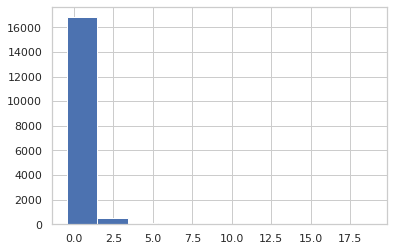

In [ ]:
fifa20['price_norm'] = (fifa20['value_eur'] - fifa20['value_eur'].mean()) / (fifa20['value_eur'].std())
fifa20.price_norm.hist()

In [ ]:
fifa20 = fifa20.dropna(thresh=0.7*len(fifa20), axis=1)
fifa20.describe


<bound method NDFrame.describe of        sofifa_id  age  height_cm  ...  country_code  club_code  price_norm
0         158023   32        170  ...             5        224   17.005348
1          20801   34        187  ...           120        350   10.244419
2         190871   27        175  ...            18        462   18.832626
4         183277   28        175  ...            12        505   16.000345
5         192985   28        181  ...            12        400   16.000345
...          ...  ...        ...  ...           ...        ...         ...
18273     245006   22        186  ...            28         79   -0.437849
18274     250995   22        177  ...            28        574   -0.437849
18275     252332   19        186  ...            28        317   -0.437849
18276     251110   18        185  ...            28        573   -0.437849
18277     233449   26        182  ...            28        317   -0.437849

[17616 rows x 58 columns]>

In [ ]:
fifa20['release_clause_eur'].fillna(fifa20['release_clause_eur'].mean(), inplace=True)


In [ ]:
X, y = fifa20, fifa20['price_norm']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,train_size=0.8,random_state=9,)

print(f"Train labels:\n{y_train}")
print(f"Test labels:\n{y_test}")
print(f"Train labels:\n{X_train}")
print(f"Test labels:\n{X_test}")

Train labels:
11384   -0.330953
13026   -0.390340
10328   -0.308112
1789     1.108028
13140   -0.330953
           ...   
4812     0.103025
4957    -0.043157
5323    -0.285271
10501   -0.335521
564      1.473484
Name: price_norm, Length: 14092, dtype: float64
Test labels:
7605    -0.280703
369      1.016665
1530     0.742573
3821    -0.289839
13986   -0.349226
           ...   
12369   -0.340089
1537     0.742573
1488     0.925301
11669   -0.340089
7951    -0.271567
Name: price_norm, Length: 3524, dtype: float64
Train labels:
       sofifa_id  age  height_cm  ...  country_code  club_code  price_norm
11384     205145   24        183  ...           127        106   -0.330953
13026     216134   29        175  ...            40         21   -0.390340
10328     240891   23        172  ...            57        233   -0.308112
1789      206594   24        180  ...            45         99    1.108028
13140     251341   18        177  ...            53        448   -0.330953
...          ...  

In [26]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=0.25,train_size=0.75,random_state=9,)
X_train.isnull().values.any()


True

In [ ]:
import pandas as pd
import numpy as np

corr = fifa20.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r' & 'BrBG' are other good diverging colormaps

R2:      0.796
MSE:     0.172


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



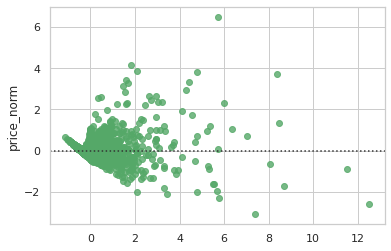

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()

columns = ['wage_eur', 'overall','mentality_composure','potential','international_reputation','movement_reactions']

model.fit(X_train[columns], y_train)

predict = model.predict(X_val[columns])

mse = mean_squared_error(y_val, predict)
r2 = r2_score(y_val, predict)

print("R2:      {:.3f}".format(r2))
print("MSE:     {:.3f}".format(mse))

sns.set(style="whitegrid")
sns.residplot(predict, y_val, color="g")
#calcular mape, male

In [25]:
import sklearn.linear_model
def objective(trial):
    # hyperparameter setting
    alpha = trial.suggest_uniform('alpha', 0.0, 2.0)
    
    # data loading and train-test split

    # model training and evaluation
    model = sklearn.linear_model.Lasso(alpha=alpha)
    model.fit(X_train[columns], y_train)
    y_pred = model.predict(X_val[columns])
    error = sklearn.metrics.mean_squared_error(y_val, y_pred)

    # output: evaluation score
    return error

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)

print('Minimum mean squared error: ' + str(study.best_value))
print('Best parameter: ' + str(study.best_params))

[I 2020-11-10 19:30:37,177] A new study created in memory with name: no-name-ef99df6a-3ce1-4337-a953-d7fccfc0b827
[I 2020-11-10 19:30:37,199] Trial 0 finished with value: 0.22361800664556522 and parameters: {'alpha': 1.6340027961523276}. Best is trial 0 with value: 0.22361800664556522.
[I 2020-11-10 19:30:37,212] Trial 1 finished with value: 0.22361861145390335 and parameters: {'alpha': 1.4663647796912056}. Best is trial 0 with value: 0.22361800664556522.
[I 2020-11-10 19:30:37,225] Trial 2 finished with value: 0.1807666819941454 and parameters: {'alpha': 0.32621510673922316}. Best is trial 2 with value: 0.1807666819941454.
[I 2020-11-10 19:30:37,237] Trial 3 finished with value: 0.22361871785318368 and parameters: {'alpha': 1.4368763598224183}. Best is trial 2 with value: 0.1807666819941454.
[I 2020-11-10 19:30:37,249] Trial 4 finished with value: 0.22361881208188014 and parameters: {'alpha': 1.4107617123723786}. Best is trial 2 with value: 0.1807666819941454.
[I 2020-11-10 19:30:37,2

Minimum mean squared error: 0.17367361395387543
Best parameter: {'alpha': 0.008444060876271958}


In [22]:
study.trials_dataframe()


,number,value,datetime_start,datetime_complete,duration,params_alpha,state
0,0,0.223617,2020-11-10 19:22:17.415372,2020-11-10 19:22:17.444404,0 days 00:00:00.029032,1.809500,COMPLETE
1,1,0.222011,2020-11-10 19:22:17.445687,2020-11-10 19:22:17.471421,0 days 00:00:00.025734,1.263619,COMPLETE
2,2,0.177311,2020-11-10 19:22:17.472709,2020-11-10 19:22:17.500113,0 days 00:00:00.027404,0.175472,COMPLETE
3,3,0.197833,2020-11-10 19:22:17.501411,2020-11-10 19:22:17.527649,0 days 00:00:00.026238,0.728110,COMPLETE
4,4,0.223618,2020-11-10 19:22:17.530387,2020-11-10 19:22:17.572654,0 days 00:00:00.042267,1.565957,COMPLETE
5,5,0.221798,2020-11-10 19:22:17.573949,2020-11-10 19:22:17.599736,0 days 00:00:00.025787,1.253436,COMPLETE
6,6,0.223618,2020-11-10 19:22:17.601055,2020-11-10 19:22:17.637293,0 days 00:00:00.036238,1.552941,COMPLETE
7,7,0.173157,2020-11-10 19:22:17.638518,2020-11-10 19:22:17.667847,0 days 00:00:00.029329,0.006190,COMPLETE
8,8,0.179551,2020-11-10 19:22:17.669308,2020-11-10 19:22:17.697125,0 days 00:00:00.027817,0.281659,COMPLETE
9,9,0.176239,2020-11-10 19:22:17.698431,2020-11-10 19:22:17.726949,0 days 00:00:00.028518,0.095805,COMPLETE


In [27]:
def objective1(trial):
    rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
    classifier_obj = sklearn.ensemble.RandomForestRegressor(
            max_depth=rf_max_depth, n_estimators=10
        )

    score = sklearn.model_selection.cross_val_score(classifier_obj, x, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [28]:
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100)
    print(study.best_trial)

[I 2020-11-10 19:49:04,922] A new study created in memory with name: no-name-e76eea40-2db6-4b5d-9968-a0ad89580fa3
[I 2020-11-10 19:49:04,938] Trial 0 finished with value: 0.27229959204238796 and parameters: {'alpha': 1.0537572259837351}. Best is trial 0 with value: 0.27229959204238796.
[I 2020-11-10 19:49:04,952] Trial 1 finished with value: 0.23482878897633758 and parameters: {'alpha': 0.40982298858818655}. Best is trial 0 with value: 0.27229959204238796.
[I 2020-11-10 19:49:04,963] Trial 2 finished with value: 0.23599411326349387 and parameters: {'alpha': 0.43881494716394465}. Best is trial 0 with value: 0.27229959204238796.
[I 2020-11-10 19:49:04,973] Trial 3 finished with value: 0.2661028176704556 and parameters: {'alpha': 0.959057501786339}. Best is trial 0 with value: 0.27229959204238796.
[I 2020-11-10 19:49:04,982] Trial 4 finished with value: 0.2753373215834662 and parameters: {'alpha': 1.1945819480079007}. Best is trial 4 with value: 0.2753373215834662.
[I 2020-11-10 19:49:04,

FrozenTrial(number=77, value=0.2782866398619164, datetime_start=datetime.datetime(2020, 11, 10, 19, 49, 5, 838020), datetime_complete=datetime.datetime(2020, 11, 10, 19, 49, 5, 849285), params={'alpha': 1.9999699193318017}, distributions={'alpha': UniformDistribution(high=2.0, low=0.0)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=77, state=TrialState.COMPLETE)


In [ ]:
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
#MLP, SVR

In [ ]:
model1  = RandomForestRegressor()
model1.fit(X_train[columns], y_train)# Mostrando importância de cada feature
model1.feature_importances_

best_random = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
best_random.fit(X_train[columns] , y_train)

array([0.02190798, 0.83757132, 0.01145406, 0.11052163, 0.00286931,
       0.01567569])

R2:      0.971
MSE:     0.025


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



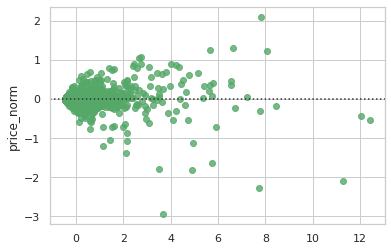

In [ ]:
predict = model1.predict(X_val[columns])

mse1 = mean_squared_error(y_val, predict)
r21 = r2_score(y_val, predict)

print("R2:      {:.3f}".format(r21))
print("MSE:     {:.3f}".format(mse1))

sns.set(style="whitegrid")
sns.residplot(predict, y_val, color="g")

R2:      0.736
MSE:     0.222


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



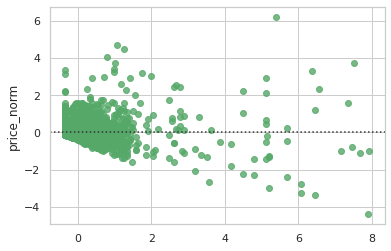

In [ ]:
from sklearn.svm import SVR

model2  = SVR()
model2.fit(X_train[columns], y_train)

predict = model2.predict(X_val[columns])

mse2 = mean_squared_error(y_val, predict)
r22 = r2_score(y_val, predict)

print("R2:      {:.3f}".format(r22))
print("MSE:     {:.3f}".format(mse2))

sns.set(style="whitegrid")
sns.residplot(predict, y_val, color="g")

R2:      -30.651
MSE:     26.696


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



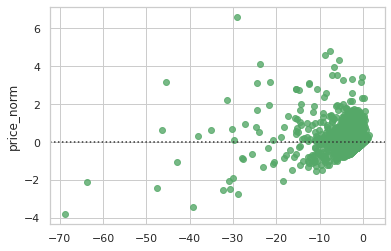

In [ ]:
from sklearn.neural_network import MLPRegressor

model3  = MLPRegressor()
model3.fit(X_train[columns], y_train)

predict = model3.predict(X_val[columns])

mse3 = mean_squared_error(y_val, predict)
r23 = r2_score(y_val, predict)

print("R2:      {:.3f}".format(r23))
print("MSE:     {:.3f}".format(mse3))

sns.set(style="whitegrid")
sns.residplot(predict, y_val, color="g")